In [ ]:
from nwb_utils import NWBUtils

# Example ephys session
ephys_path = "/root/capsule/data/" \
             "ecephys_776293_2025-02-14_15-19-17_sorted_2025-02-28_21-37-07/" \
             "nwb/" \
             "ecephys_776293_2025-02-14_15-19-17_experiment1_recording1.nwb"

# Example behavior/ophys session
ophys_path = "/root/capsule/data/" \
             "behavior_777403_2025-04-11_16-53-47_processed_2025-04-12_04-37-54/" \
             "nwb/" \
             "behavior_777403_2025-04-11_16-53-47.nwb"

# Read ephys
ephys_data = NWBUtils.read_ephys_nwb(nwb_full_path=ephys_path)
# ephys_data will be None on failure, or the NWBFile-like object on success.

# Read ophys/behavior
ophys_data = NWBUtils.read_ophys_nwb(nwb_full_path=ophys_path)
# ophys_data will likewise be None on failure, or the NWBFile-like object on success.


In [ ]:
from nwb_utils import NWBUtils

ephys_data = NWBUtils.read_ephys_nwb(
    session_name="776293_2025-02-14_15-19-17"
)

ophys_data = NWBUtils.read_ophys_nwb(
    session_name="777403_2025-04-11_16-53-47"
)


In [ ]:
from general_utils import find_ephys_sessions, find_behavior_sessions
from nwb_utils import NWBUtils

def main():
    data_root = '/root/capsule/data/'

    # 1. Find all ephys sessions
    all_ephys, ephys_by_animal, spike_sorted = find_ephys_sessions(data_root)
    print("All ephys sessions:", all_ephys)
    print("Spike-sorted sessions:", spike_sorted)

    # 2. Find all behavior sessions
    all_behav, behav_by_animal, processed_behav = find_behavior_sessions(data_root)
    print("All behavior sessions:", all_behav)
    print("Processed behavior sessions:", processed_behav)

    # 3. Read the first spike-sorted ephys session
    if spike_sorted:
        first_ephys = spike_sorted[0]
        print(f"\nLoading ephys session: {first_ephys}")
        ephys_data = NWBUtils.read_ephys_nwb(
            session_name=first_ephys,
            folder_path=data_root
        )
        # ephys_data is None on failure, or the NWBFile-like object on success

    # 4. Read the first processed behavior session
    if processed_behav:
        first_behav = processed_behav[0]
        print(f"\nLoading behavior session: {first_behav}")
        behav_data = NWBUtils.read_ophys_nwb(
            session_name=first_behav,
            folder_path=data_root
        )
        # behav_data is None on failure, or the NWBFile-like object on success

if __name__ == "__main__":
    main()


In [ ]:
from behavior_utils import extract_event_timestamps
from nwb_utils import NWBUtils
behav_data = NWBUtils.read_ophys_nwb(session_name='behavior_762206_2025-01-17_16-20-02_processed_2025-01-18_07-17-12')
behav_data = NWBUtils.read_behavior_nwb(session_name='ecephys_753125_2024-10-14_15-37-15_sorted_2024-11-09_20-07-38')
extract_event_timestamps(behav_data,'left_lick')

['QLearning_L1F1_CK1_softmax', 'QLearning_L1F0_epsi', 'QLearning_L2F1_softmax', 'WSLS', 'QLearning_L2F1_CK1_softmax']
Found ephys NWB: /root/capsule/data/ecephys_764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33/nwb/ecephys_764790_2024-12-19_16-11-34_experiment1_recording1.nwb
Successfully read ephys NWB from: /root/capsule/data/ecephys_764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33/nwb/ecephys_764790_2024-12-19_16-11-34_experiment1_recording1.nwb
Found behavior NWB: /root/capsule/data/behavior_nwb/764790_2024-12-19_16-11-34.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/764790_2024-12-19_16-11-34.nwb
Successfully appended units table to behavior NWB.


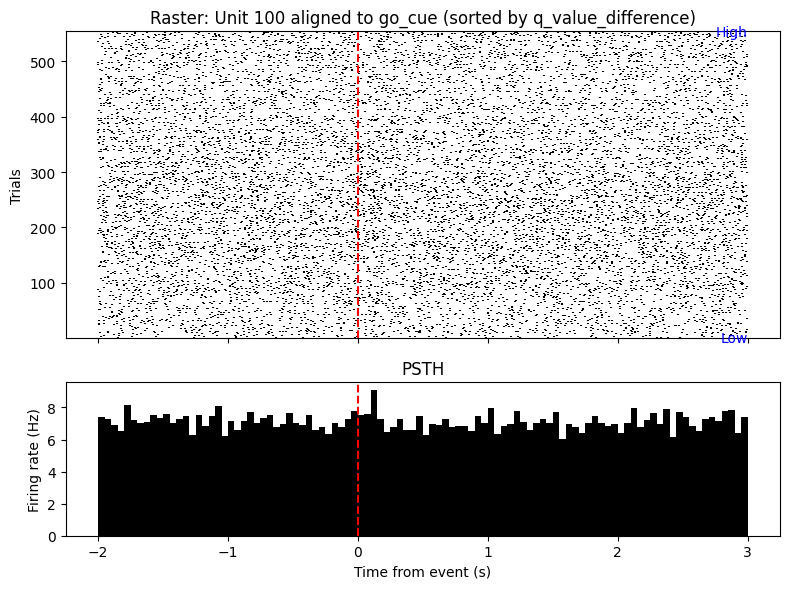

Figure saved as /root/capsule/results/764790_2024-12-19_16-11-34_unit_100.pdf


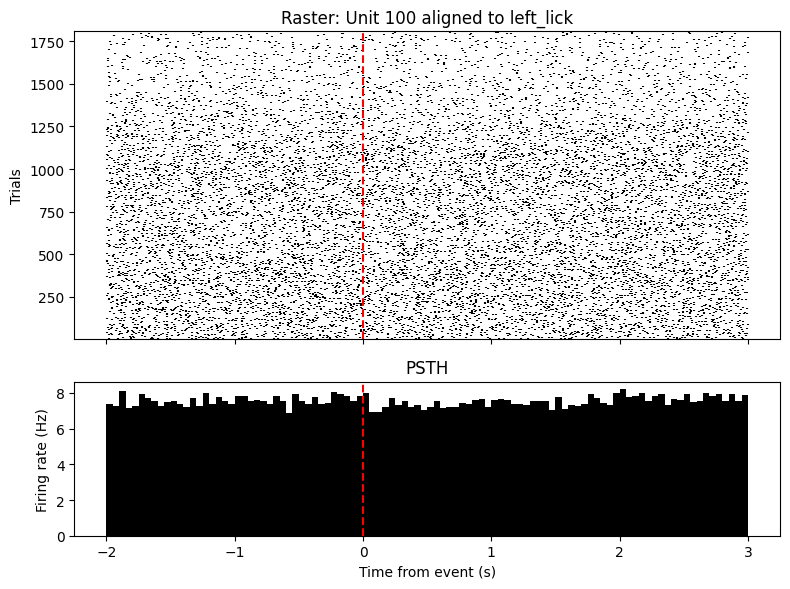

In [3]:
from ephys_behavior import plot_raster_graph
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data, find_trials,get_fitted_model_names


session_name='ecephys_776293_2025-02-18_12-51-36_sorted_2025-03-30_05-50-33'
session_name='764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'
#session_name='764790_2024-12-19_16-11-34'
print(get_fitted_model_names(session_name=session_name))

nwb_data,tag=NWBUtils.combine_nwb(session_name=session_name)
fitted_data=extract_fitted_data(nwb_behavior_data=nwb_data,session_name=session_name,model_alias='QLearning_L1F1_CK1_softmax',latent_name='q_value_difference')
exclude_trials=find_trials(nwb_behavior_data=nwb_data,trial_type='no_response')

plot_raster_graph(nwb_data=nwb_data,unit_index=100,fitted_data=fitted_data,exclude_trials=exclude_trials,latent_name='q_value_difference')
plot_raster_graph(nwb_data=nwb_data,unit_index=100,align_to_event='left_lick',save_figure=True,figure_name_prefix='764790_2024-12-19_16-11-34',save_format='pdf')

nwb_data.io.close()


In [1]:
from ephys_behavior import plot_raster_graph
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data, find_trials,get_fitted_model_names,generate_behavior_summary


session_name='ecephys_776293_2025-02-18_12-51-36_sorted_2025-03-30_05-50-33'
session_name='764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'
#session_name='764790_2024-12-19_16-11-34'
print(get_fitted_model_names(session_name=session_name))

nwb_data,tag=NWBUtils.combine_nwb(session_name=session_name)
fitted_data=extract_fitted_data(nwb_behavior_data=nwb_data,session_name=session_name,model_alias='QLearning_L1F1_CK1_softmax',latent_name='q_value_difference')
exclude_trials=find_trials(nwb_behavior_data=nwb_data,trial_type=['no_response','no_response'])


summary=generate_behavior_summary(nwb_data)

nwb_data.io.close()


['QLearning_L1F1_CK1_softmax', 'QLearning_L1F0_epsi', 'QLearning_L2F1_softmax', 'WSLS', 'QLearning_L2F1_CK1_softmax']
Found ephys NWB: /root/capsule/data/ecephys_764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33/nwb/ecephys_764790_2024-12-19_16-11-34_experiment1_recording1.nwb
Successfully read ephys NWB from: /root/capsule/data/ecephys_764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33/nwb/ecephys_764790_2024-12-19_16-11-34_experiment1_recording1.nwb
Found behavior NWB: /root/capsule/data/behavior_nwb/764790_2024-12-19_16-11-34.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/764790_2024-12-19_16-11-34.nwb
Successfully appended units table to behavior NWB.


In [4]:
df=generate_behavior_summary_combined(session_names=['ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48','764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'],save_result=True)

NameError: name 'generate_behavior_summary_combined' is not defined

In [5]:
from ephys_behavior import plot_raster_graph,get_units_passed_default_qc
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data, find_trials,get_fitted_model_names


session_name='ecephys_776293_2025-02-18_12-51-36_sorted_2025-03-30_05-50-33'
session_name='764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'
#session_name='764790_2024-12-19_16-11-34'
print(get_fitted_model_names(session_name=session_name))

ephys_nwb=NWBUtils.read_ephys_nwb(session_name=session_name)
units_passing_qc=get_units_passed_default_qc(ephys_nwb)

ephys_nwb.io.close()

['QLearning_L1F1_CK1_softmax', 'QLearning_L1F0_epsi', 'QLearning_L2F1_softmax', 'WSLS', 'QLearning_L2F1_CK1_softmax']
Found ephys NWB: /root/capsule/data/ecephys_764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33/nwb/ecephys_764790_2024-12-19_16-11-34_experiment1_recording1.nwb
Successfully read ephys NWB from: /root/capsule/data/ecephys_764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33/nwb/ecephys_764790_2024-12-19_16-11-34_experiment1_recording1.nwb
Number of units passing QC: 514


In [1]:
from behavior_utils import generate_behavior_summary_combined

df=generate_behavior_summary_combined(session_names=['ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48','764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'],save_result=True)

Found behavior NWB: /root/capsule/data/behavior_nwb/behavior_764769_2024-12-11_18-21-49.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/behavior_764769_2024-12-11_18-21-49.nwb
The response returned an empty list. No data was found for session:764769_2024-12-11_18-21-49.nwb model:QLearning_L1F1_CK1_softmax.
The response returned an empty list. No data was found for session:764769_2024-12-11_18-21-49.nwb model:QLearning_L1F1_CK1_softmax.
The response returned an empty list. No data was found for session:764769_2024-12-11_18-21-49.nwb model:QLearning_L1F1_CK1_softmax.
The response returned an empty list. No data was found for session:764769_2024-12-11_18-21-49.nwb model:QLearning_L1F1_CK1_softmax.
The response returned an empty list. No data was found for session:764769_2024-12-11_18-21-49.nwb model:QLearning_L2F1_softmax.
The response returned an empty list. No data was found for session:764769_2024-12-11_18-21-49.nwb model:QLearning_L2F1_softmax.
The response re

In [2]:
df

,session_id,QLearning_L1F1_CK1_softmax_q_value_difference,QLearning_L1F1_CK1_softmax_total_value,QLearning_L1F1_CK1_softmax_right_choice_probability,QLearning_L1F1_CK1_softmax_RPE,QLearning_L2F1_softmax_q_value_difference,QLearning_L2F1_softmax_total_value,QLearning_L2F1_softmax_right_choice_probability,QLearning_L2F1_softmax_RPE,QLearning_L2F1_CK1_softmax_q_value_difference,QLearning_L2F1_CK1_softmax_total_value,QLearning_L2F1_CK1_softmax_right_choice_probability,QLearning_L2F1_CK1_softmax_RPE,no_response_trials,response_trials,rewarded_trials,unrewarded_trials,left_rewarded_trials,right_rewarded_trials
0,764769_2024-12-11_18-21-49,None,None,None,None,None,None,None,None,None,None,None,None,"[431, 433, 435, 436, 438, 439, 440, 441, 446, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 4, 6, 9, 10, 11, 12, 13, 18, 19, 20, 21, 2...","[0, 1, 3, 5, 7, 8, 14, 15, 16, 17, 22, 23, 25,...","[9, 10, 28, 31, 33, 34, 35, 36, 38, 41, 44, 45...","[2, 4, 6, 11, 12, 13, 18, 19, 20, 21, 24, 30, ..."
1,764790_2024-12-19_16-11-34,"[0.0, 0.0, -0.08847402785716589, -0.1691204021...","[0.0, 0.0, 0.08847402785716589, 0.169120402109...","[0.45075149517575763, 0.13026680676686578, 0.1...","[0.0, 0.0, 0.9115259721428342, 0.8308795978909...","[0.0, 0.0, -0.6186450741380038, -0.85456842052...","[0.0, 0.0, 0.6186450741380038, 0.8545684205207...","[0.4679394421066894, 0.4679394421066894, 0.467...","[0.0, 0.0, 0.38135492586199615, 0.145431579479...","[0.0, 0.0, -0.5652476853989704, -0.81099042494...","[0.0, 0.0, 0.5652476853989704, 0.8109904249490...","[0.46837174595647457, 0.33729619204084277, 0.3...","[0.0, 0.0, 0.4347523146010296, 0.1890095750509...","[38, 340, 390, 428, 434, 460, 463, 499, 513, 5...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 3, 6, 7, 8, 9, 16, 20, 22, 36, 37, 39, 42,...","[0, 1, 4, 5, 10, 11, 12, 13, 14, 15, 17, 18, 1...","[2, 3, 6, 7, 8, 9, 16, 20, 22, 36, 39, 42, 79,...","[37, 59, 61, 63, 67, 70, 117, 118, 121, 122, 1..."


In [7]:
from ephys_behavior import plot_raster_graph,get_the_mean_firing_rate,get_the_mean_firing_rate_combined_sessions
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data, find_trials,get_fitted_model_names



#df=get_the_mean_firing_rate(nwb_data=nwb_data,time_windows=[[-1,0],[0,2]],z_score=[True,False])
df=get_the_mean_firing_rate_combined_sessions(session_names=['ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48','764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'],save_result=True)



Processing session ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48...
Found ephys NWB: /root/capsule/data/ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48/nwb/ecephys_764769_2024-12-11_18-21-49_experiment1_recording1.nwb
Successfully read ephys NWB from: /root/capsule/data/ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48/nwb/ecephys_764769_2024-12-11_18-21-49_experiment1_recording1.nwb
Found behavior NWB: /root/capsule/data/behavior_nwb/behavior_764769_2024-12-11_18-21-49.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/behavior_764769_2024-12-11_18-21-49.nwb
Successfully appended units table to behavior NWB.
Number of units passing QC: 670


In [2]:
df

,session_id,unit_index,time_window,z_score,rates
0,764769_2024-12-11_18-21-49,7,-1_0,True,"[-0.7147993945491098, -0.7147993945491098, -0...."
1,764769_2024-12-11_18-21-49,7,-1_0,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,764769_2024-12-11_18-21-49,7,0_2,True,"[-0.6968019050989409, -0.9848723209875331, -0...."
3,764769_2024-12-11_18-21-49,7,0_2,False,"[0.5, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, ..."
4,764769_2024-12-11_18-21-49,19,-1_0,True,"[-1.1417347416964663, -1.1417347416964663, -1...."
...,...,...,...,...,...
4731,764790_2024-12-19_16-11-34,1743,0_2,False,"[1.5, 0.5, 1.5, 1.0, 1.0, 0.5, 0.5, 1.0, 0.5, ..."
4732,764790_2024-12-19_16-11-34,1747,-1_0,True,"[-1.4984472272233982, -1.6584045031528003, -1...."
4733,764790_2024-12-19_16-11-34,1747,-1_0,False,"[2.0, 1.0, 1.0, 7.0, 9.0, 15.0, 2.0, 13.0, 13...."
4734,764790_2024-12-19_16-11-34,1747,0_2,True,"[0.36934662093038995, 0.030707139424671136, -0..."
